# Convolutional Neural Networks (CNN)

- Convolutional neural networks leverage spatial information, making them good for classifying images.

## Deep Convolutional Neural networks

- Deep Convolutional Neural Network (DCNN) consists of man neural network layers.

### local receptive fields

- To perserve spatial information of an image, it is often convenient to represent each image with a matrix of pixels.
- Ti accinokusg a sunoke wat ti accinokusg us ti ebcide tge kycal structure into a submatrix of adjacent input neurons.

### Shared weights and bias
### A mathematical example
### ConvNets in TensorFlow

- Add convolutional layer with 32 parallel features and filter

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

2024-07-04 04:17:59.776327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 04:17:59.776362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 04:17:59.779359: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-04 04:17:59.790595: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 04:18:02.936372: E external/local_xla/xla/

### Pooling layers
- Summarize the output of a feature map.

### Max pooling
- Max pooling operator, it outputs the maximum activation as observed in the region

In [2]:
model.add(layers.MaxPooling2D((2, 2)))

### Average pooling
- Another choice is to aggregate the region into the average of the values.

### An example of DCNN: LeNet
- Another example of the MNIST dataset, but using convolution.  LeNet has lower layers alternating convolution operations with max-pooling operations.

In [3]:
## to define a LeNet, we will use layers.Convolution2D.
##     where the first parameter is the number of output filters, and the next
##     tuble is the extension for each filter.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# network and training
EPOCHS = 5
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT = 0.90

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10 # number of output = number of digits

## Define the LeNet network
class LeNet:
    def build(input_shape, classes):
        model = models.Sequential()
    
        ## Max pooling implements a sliding window, over the layer and takes maximum
        # CONV => RELU => POOL
        model.add(layers.Convolution2D(50, (5, 5), activation='relu',
                                      input_shape=input_shape))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
        ##Add second convolution stage
        # CONV => RELU => POOL
        model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
        ## Flatten and run a standard dense network
        # Flatten => RELU Layers
        model.add(layers.Flatten())
        model.add(layers.Dense(500, activation='relu'))
        # a softmax classifier
        model.add(layers.Dense(classes, activation='softmax'))
        return model    

In [4]:
## Train the network
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# convert class vectors to binary class matices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# intalize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
              metrics=["accuracy"])
model.summary()

# I've had the damndest time getting tensorboard to work, skipping
#callbacks = [
#    # Write TensorBoard logs to './logs' directory
#    tf.keras.callbacks.TensorBoard(log_dir='./logs')
#]

# fit
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
                    #callbacks=callbacks)
                   )

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score: ", score[0])
print("Test accuracy:", score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 50)        1300      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 50)          62550     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 50)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 500)              

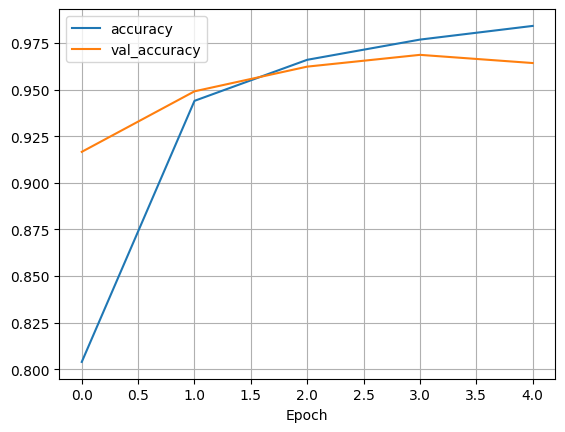

In [5]:
import matplotlib.pyplot as plt

#plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

### recognizing CIFAR-10 images with deep learning

- CIFAR-10 contains 60000 color images of 32*32 pixels in three channels.  Divided into 10 classes, with each class containing 6000 images.

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# CIFAR_10 is a set of 60k images 32*32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# Constants
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
BERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

- Out net will lear 32 convolutional filters, each of size 3*3.  The output dimension is the same as the input shape, so 32*32.

In [7]:
# defin the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3, 3), activation='relu',
            input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    # Deep pipline is a dense network with 512 units and ReLU activation
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

- Now train the model (parts of code not included into the book

In [8]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the dataset
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert the y_train and y_test to categorical
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

model = build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               3686912   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                      

In [9]:
## Skipping the TensorBoard
#callbacks = [
#  # Write TensorBoard logs to `./logs` directory
#    tf.keras.callbacks.TensorBoard(log_dir='./logs')
#]

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIM,
              metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=VALIDATION_SPLIT,
          verbose=VERBOSE,
          #callbacks=callbacks)
         )
score = model.evaluate(X_test, y_test,
                       batch_size=BATCH_SIZE,
                       verbose=VERBOSE)

print('\nTest score: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/20
313/313 [==============================] - 16s 49ms/step - loss: 1.7598 - accuracy: 0.3740 - val_loss: 1.5072 - val_accuracy: 0.4653
Epoch 2/20
313/313 [==============================] - 15s 48ms/step - loss: 1.4137 - accuracy: 0.4998 - val_loss: 1.3678 - val_accuracy: 0.5102
Epoch 3/20
313/313 [==============================] - 15s 49ms/step - loss: 1.2703 - accuracy: 0.5536 - val_loss: 1.2462 - val_accuracy: 0.5717
Epoch 4/20
313/313 [==============================] - 15s 48ms/step - loss: 1.1818 - accuracy: 0.5846 - val_loss: 1.1356 - val_accuracy: 0.6052
Epoch 5/20
313/313 [==============================] - 15s 48ms/step - loss: 1.1034 - accuracy: 0.6125 - val_loss: 1.1180 - val_accuracy: 0.5991
Epoch 6/20
313/313 [==============================] - 15s 48ms/step - loss: 1.0331 - accuracy: 0.6369 - val_loss: 1.0545 - val_accuracy: 0.6330
Epoch 7/20
313/313 [==============================] - 15s 48ms/step - loss: 0.9802 - accuracy: 0.6604 - val_loss: 1.0497 - val_accuracy:

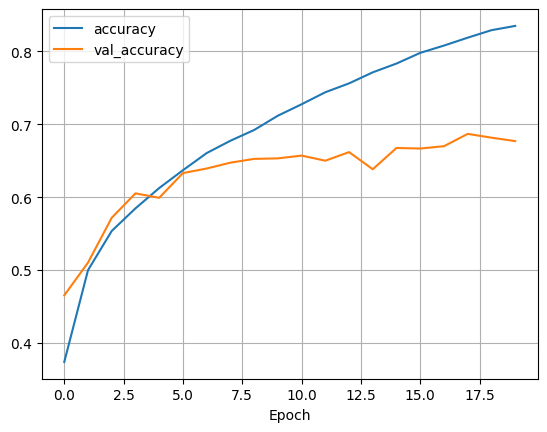

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

### Improving the CIFAR-10 performance with deeper network

- 1st module: (CONV+CONV+MaxPool+Droupout)
- 2nd module: (CONV+CONV+MaxPool+Droupout)
- 3rd module: (CONV+CONV+MaxPool+Droupout)

In [11]:
def build_model():
    model = models.Sequential()

    # 1st block
    model.add(layers.Conv2D(32, (3, 3), padding='same',
            input_shape=x_train.shape[1:],
            activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))

    # 2nd block
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))

    # 3rd block
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.4))

    # Dense
    model.add(layers.Flatten())
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    return model

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

EPOCHS = 50
NUM_CLASSES = 10

def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    # Normalize
    mean = np.mean(x_train, axis = (0, 1, 2, 3))
    std = np.std(x_train, axis=(0, 1, 2, 3))
    x_train = (x_train - mean) / (std + 1e-7)
    x_test = (x_test - mean) / (std + 1e-7)
    
    y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

    return x_train, y_train, x_test, y_test

Epoch 1/50
782/782 [==============================] - 112s 142ms/step - loss: 1.7590 - accuracy: 0.4698 - val_loss: 1.2632 - val_accuracy: 0.5704
Epoch 2/50
782/782 [==============================] - 112s 144ms/step - loss: 1.0902 - accuracy: 0.6486 - val_loss: 0.9810 - val_accuracy: 0.6685
Epoch 3/50
782/782 [==============================] - 113s 144ms/step - loss: 0.8675 - accuracy: 0.7148 - val_loss: 0.9028 - val_accuracy: 0.7264
Epoch 4/50
782/782 [==============================] - 114s 145ms/step - loss: 0.7455 - accuracy: 0.7500 - val_loss: 0.8054 - val_accuracy: 0.7252
Epoch 5/50
782/782 [==============================] - 114s 146ms/step - loss: 0.6693 - accuracy: 0.7744 - val_loss: 0.7830 - val_accuracy: 0.7479
Epoch 6/50
782/782 [==============================] - 115s 147ms/step - loss: 0.6064 - accuracy: 0.7937 - val_loss: 0.6897 - val_accuracy: 0.7714
Epoch 7/50
782/782 [==============================] - 115s 147ms/step - loss: 0.5558 - accuracy: 0.8094 - val_loss: 0.5791 -

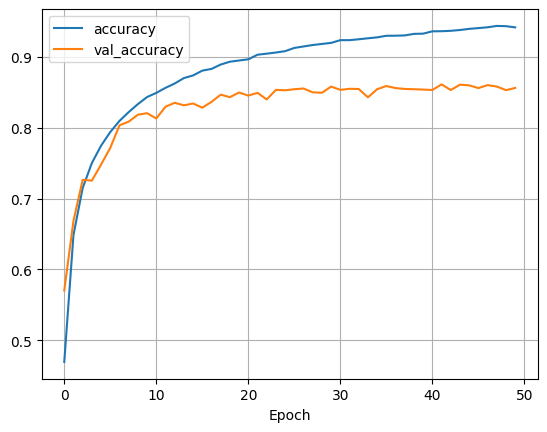

In [13]:
(x_train, y_train, x_test, y_test) = load_data()
model = build_model()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics = ['accuracy'])

# Train
batch_size = 64

history = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = EPOCHS,
          validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size)

print('\nTest score: ', score[0])
print('Test accuracy: ', score[1])

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

### Improving the CIFAR-10 performance with data augentations

- We can improve our model by generating more images, take the training set and augment this set with multiple types of transformations

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# image augementation
datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True
)
datagen.fit(x_train)

In [15]:
import scipy

# train 
batch_size = 64
model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                    epochs = EPOCHS,
                    verbose = 1, validation_data = (x_test, y_test))

# save to dist
model_json = model.to_json()
with open('./logs/model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('./logs/model.h5')

# test
scores = model.evaluate(x_test, y_test, batch_size = 128,
                        verbose = 1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100, scores[0]))

Epoch 1/50


/tmp/ipykernel_113063/2473487061.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),


782/782 [==============================] - 117s 149ms/step - loss: 0.9599 - accuracy: 0.6910 - val_loss: 0.5664 - val_accuracy: 0.8091
Epoch 2/50
782/782 [==============================] - 117s 149ms/step - loss: 0.8049 - accuracy: 0.7222 - val_loss: 0.5232 - val_accuracy: 0.8255
Epoch 3/50
782/782 [==============================] - 117s 150ms/step - loss: 0.7600 - accuracy: 0.7376 - val_loss: 0.5656 - val_accuracy: 0.8155
Epoch 4/50
782/782 [==============================] - 117s 150ms/step - loss: 0.7424 - accuracy: 0.7439 - val_loss: 0.5219 - val_accuracy: 0.8301
Epoch 5/50
782/782 [==============================] - 117s 150ms/step - loss: 0.7183 - accuracy: 0.7514 - val_loss: 0.5542 - val_accuracy: 0.8174
Epoch 6/50
782/782 [==============================] - 117s 149ms/step - loss: 0.7123 - accuracy: 0.7525 - val_loss: 0.5263 - val_accuracy: 0.8260
Epoch 7/50
782/782 [==============================] - 117s 150ms/step - loss: 0.6986 - accuracy: 0.7582 - val_loss: 0.5839 - val_accura

### Predicting with CIFAR-10

- Let's use our model for the evaluation of images

In [43]:
import numpy as np
import scipy.misc
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

## FIXED since scipy.misc.imresize has been removed
from skimage.transform import resize
from imageio.v2 import imread

# Load the model
model_architecture = './logs/model.json'
model_weights = './logs/model.h5'
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

# Load images
img_names = ['cat.jpg', 'cat-standing.jpg', 'dog.jpg']
#imgs = [np.transpose(scipy.misc.imresize(scipy.misc.imread(img_name), (23, 32)),
#                     (2, 0, 1)).astype('float32') for image_name in img_names]
## FIXED since scipy.misc.imresize has been removed
imgs = [resize(imread(img_name), (32, 32)).astype("float32") for img_name in img_names]


## Data is already normalized (I think)
#imgs = np.array(imgs) / 255.0
img = np.array(imgs[1]) / 255.0

# Train
optim = SGD()
model.compile(loss='categorical_crossentropy',
              optimizer=optim, metrics=['accuracy'])

# Predict
#predictions = model.predict_classes(imgs)
predictions = model.predict(img.reshape((1,32,32,3)))
print(predictions)

1/1 [==============================] - 0s 98ms/step
[[0.39958066 0.00097711 0.25440297 0.01815619 0.03163831 0.0039169
  0.02720182 0.00239135 0.26072523 0.0010094 ]]


### Very deep convolutional networks for large-scale image recognition

- Define a 16 deep layer, implementation of Java Caffe to model on the ImageNet ILSVRC-2012 dataset

In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models

# define a VGG16 network

def VGG_16(weights_path=None):
    model = models.Sequential()
    model.add(layers.ZeroPadding2D((1, 1), input_shape=(224, 224, 3)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1, 1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Flatten())

    # Top layer of the VGG
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

### Recognizing cats with a VGG16 network

In [50]:
## recognizing cats with VGG16 network
## OLD VERSION

#import cv2

#im = cv2.resize(cv2.imread('cat.jpg'), (224, 224)).astype(np.float32)
#im = im.transpose((2, 0, 1))
#im = np.expand_dims(im, axis=0)

# Test pretrained model
#model = VGG('.../vgg16_weights_tf_dim_ordering_tf_kernels.h5')
#model.summary()
#model.compile(optimizer='sgd', loss='categorical_crossentropy')
#out = model.predict(im)
#print(np.argmax(out))

### Utilizing the tf.Keras built-in VGG16 net module

- <b>Also not working</b>

In [52]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np
import cv2

# prebuild model with pre-trained weights on imagenet
model = VGG16(weights='imagenet', include_top=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy')

# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('steam-locomotive.jpg'), (224, 224))
im = np.expand_dims(im, axis=0)
im.astype(np.float32)

# predict
out = model.predict(im)
index = np.argmax(out)
print(index)

#plt.plot(out.ravel())
#plt.show()

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

### Recycling pre-built deep learning models for extracting features

- Use VGG16 for feature extraction.

In [ ]:
import tensorflow as tf
from tensorflow.keras.application.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

# Prebuild model with pre-trained weights on imagenet
base_model = VGG16(weights='imagenet', include_top=True)
print(base_model)
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)

# Extract features from block4_pool block
model = models.Model(inputs=base_model.input,
                     outputs=base_model.get_layer('block4_pool').output)

img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Get the features from this block
features = model.predict(x)
print(features)

### Deep Inception V3 for transfer learning

    - 

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
# Create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

2024-08-23 04:13:49.847456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 04:13:49.848001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 04:13:49.943711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-23 04:13:50.128905: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-23 04:13:53.357471: E external/local_xla/xla/

87910968/87910968 [==============================] - 12s 0us/step


In [2]:
## Look at the last four layers

# Layer.name, layer.input, layer.output_shape

In [ ]:
# When using include_top=False remove the last three layers and exposing the mixed_10layer.

x = base_model.output
# Lets's add a fully-connected layer as first layer
x = layers.Dense(1024, activation='relu')(x)

# add a logistic layer with 200 classes as last layer
predictions = layers.Dense(200, activation='softmax')(x)
